Сохраните ваше решение в формате Name_Surname.ipynb, например Ivan_Ivanov.ipynb

# Линейная регрессия

В данном задании мы рассмотрим стандартный датасет для задачи регрессии Boston Housing, в котором необходимо предсказать стоимость недвижимости по 13 признакам.

Датасет достаточно просто загрузить из библиотеки scikit-learn:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
%pylab inline

import seaborn as sns
sns.set(style="whitegrid")

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
def pairplot(df, target):
    ncol, nrow = 7, df.shape[1] // 7 + (df.shape[1] % 7 > 0)
    plt.figure(figsize=(ncol * 4, nrow * 4))

    for i, feature in enumerate(df.columns):
        plt.subplot(nrow, ncol, i + 1)
        plt.scatter(df[feature], target, s=10, marker='o', alpha=.6)
        plt.xlabel(feature)
        if i % ncol == 0:
            plt.ylabel('target')

In [4]:
data = datasets.load_boston()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y = data.target

In [5]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Разделим выборку на обчающую и тестовую в отоншении 8/2:

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df, y, train_size=0.8, random_state=42)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите стандартную линейную регрессию, а также с $L_1$ и $L_2$ регуляризаторами (используйте параметры по умолчанию). Посчитайте метрику $R^2$ для каждого метода (метод score).

In [8]:
# standart
standart_reg = LinearRegression().fit(x_train, y_train)
standart_reg.score(x_test, y_test)

0.6687594935356307

In [9]:
# l1
l1_reg = Lasso()
l1_reg.fit(x_train, y_train)
l1_reg.score(x_test, y_test)

0.6671453631686304

In [10]:
# l2
l2_reg = Ridge()
l2_reg.fit(x_train, y_train)
l2_reg.score(x_test, y_test)

0.666222167016852

__Задание 2.__ Подбор гиперпараметров.

**(2 балла)**

Для Lasso- и Ridge-регресий подберите коэффициет регуляризации по обучающей выборке с помощью кросс-валидации. Параметры для перебора возьмите по логарифмической сетке от $10^{-6}$ до $10^6$).
Также посчитайте метрику $R^2$ для тестовой выборки и сравните с предыдущими результатами. Заметно ли изменилось качество?

Useful: GridSearchCV, RidgeCV, LassoCV

In [11]:
alphas = np.logspace(-6, 6, num=13)
log_alphas = np.linspace(-6, 6, 13)

In [12]:
l1_clf = LassoCV(alphas=alphas, cv=5).fit(x_train, y_train)
l1_clf.score(x_test, y_test)

0.6687595306431894

In [13]:
l1_best = l1_clf.alpha_
l1_best

1e-06

In [14]:
l2_clf = RidgeCV(alphas=alphas, cv=5).fit(x_train, y_train)
l2_clf.score(x_test, y_test)

/usr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6687594927462259

In [15]:
l2_best = l2_clf.alpha_
l2_best

1e-06

Качество улучшилось на десятые процента, не значительно

Пстройте график зависимости $R^2$ для обучающей и тестовой (на кросс-валидации) выборок в зависимости от значения гиперпараметра. Для Lasso также постройте график зависимости количества ненулевых весов.

In [16]:
l1_cross_val_scores = []
l1_scores = []
l1_coefs = []
for alpha in alphas:
    clf = Lasso(alpha=alpha)
    tmp = cross_val_score(clf, x_train, y_train, cv=5)
    l1_cross_val_scores.append(np.mean(tmp))
    
    clf = Lasso(alpha=alpha)
    clf.fit(x_train, y_train)
    l1_scores.append(clf.score(x_test, y_test))
    l1_coefs.append(np.count_nonzero(clf.coef_))

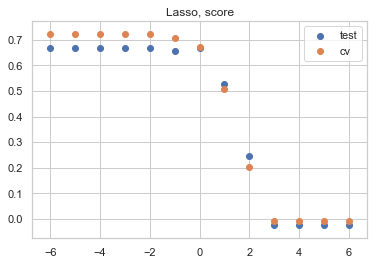

In [17]:
plt.title('Lasso, score')

plt.scatter(log_alphas, l1_scores, label='test')
plt.scatter(log_alphas, l1_cross_val_scores, label='cv')
plt.legend()
plt.show()

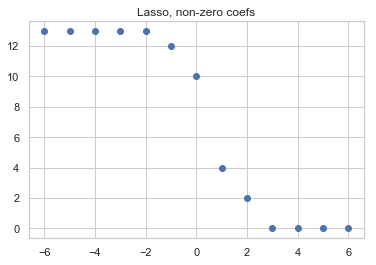

In [18]:
plt.scatter(log_alphas, l1_coefs)
plt.title('Lasso, non-zero coefs')
plt.show()

In [19]:
l2_cross_val_scores = []
l2_scores = []

for alpha in alphas:
    clf = Ridge(alpha=alpha)
    tmp = cross_val_score(clf, x_train, y_train, cv=5)
    l2_cross_val_scores.append(np.mean(tmp))
    
    clf = Ridge(alpha=alpha)
    clf.fit(x_train, y_train)
    l2_scores.append(clf.score(x_test, y_test))

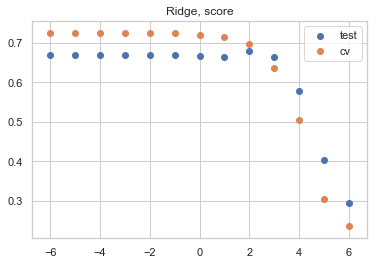

In [20]:
plt.title('Ridge, score')

plt.scatter(log_alphas, l2_scores, label='test')
plt.scatter(log_alphas, l2_cross_val_scores, label='cv')
plt.legend()
plt.show()

В какой момент происходит недообучение? Почему?

__Ответ__:
Недообучение происходит при альфа больших 1 в Lasso и больших 100 для Ridge. При больших альфа модели становятся слишком простыми и точность падает (это также подтверждает, что при альфа больших 1 в Lasso резко падает количество ненулевых коэффициентов).

## Подготовка данных

Как вы могли заметить, большого прироста качества с помощью подбора коэфициента регуляризации добиться не удалось. Поэтому прежде чем бросаться обучать модели, необходимо изучить и предобработать данные.

__Задание 3.__ Нормализация.

__(2 балл)__

Зачастую признаки в сырых данных имеют разный масштаб. Попробуйте применить нормализацию к данным, сравните качество. Заметно ли изменение?

Pipeline, StandardScaler, MinMaxScaler

In [21]:
scaler = StandardScaler()
norm_x_train = scaler.fit_transform(x_train)
norm_x_test = scaler.transform(x_test)

In [22]:
norm_x_train.shape, x_train.shape

((404, 13), (404, 13))

In [23]:
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', RidgeCV(alphas=alphas, cv=5, scoring="r2"))])

In [24]:
pipe.fit(x_train, y_train)
score = pipe.score(x_test, y_test)
print(f'score: {score}')
print(f"alpha: {pipe['clf'].alpha_}")

score: 0.6684624359643558
alpha: 1.0


In [25]:
scaler = MinMaxScaler()
norm_x_train = scaler.fit_transform(x_train)
norm_x_test = scaler.transform(x_test)

In [26]:
norm_x_train.shape, x_train.shape

((404, 13), (404, 13))

In [27]:
pipe = Pipeline([
        ('scale', MinMaxScaler()),
        ('clf', RidgeCV(alphas=alphas, cv=5, scoring="r2"))])

In [28]:
pipe.fit(x_train, y_train)
score = pipe.score(x_test, y_test)
print(f'score: {score}')
print(f"alpha: {pipe['clf'].alpha_}")

score: 0.6700309977617649
alpha: 0.1


Изменение незначительное (десятые процента)

Сравните оптимальное значение коэффициента регуляризации для Ridge-регрессии до и после нормализации. Изменилось ли оно? Предположите почему так могло произойти.

__Ответ:__
Изменилось. Порядки значений в матрице весов должны были поменяться из-за нормализации, поэтому 𝛼 изменилось.

__Задание 4.__ Новые признаки.

__(2 балла)__

Полезным также бывает посмотреть как целевая переменная зависит от каждого признака.

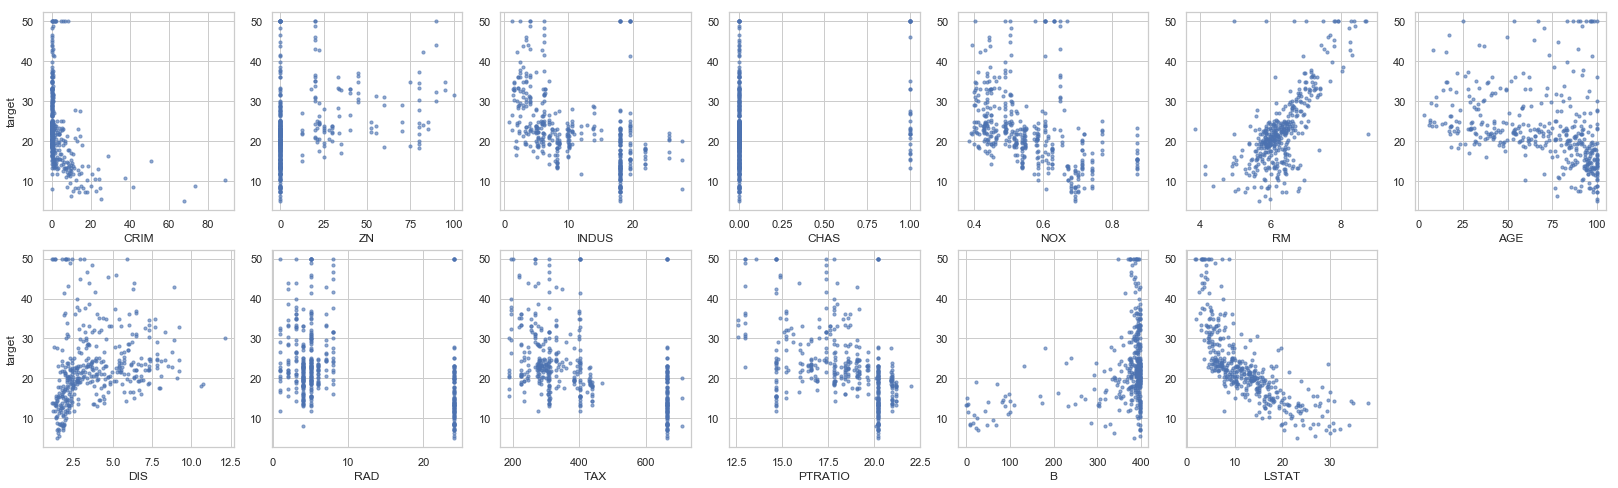

In [29]:
pairplot(x_train, y_train)

Обратите внимение на зависимость цены от признака LSTAT. Является ли эта зависимость линейной? А какой? Попробуйте выбрать преобразование для этого признака так чтобы получившаяся зависимость была более линейной. Добейтесь $R^2$ на тестовой выборке не меньше 0.71.

In [30]:
df_copy = df.copy()

In [31]:
df_copy['LSTAT'] = df_copy['LSTAT'].apply(lambda x: 1.0/(x**0.5))
x_train, x_test, y_train, y_test = train_test_split(df_copy, y, train_size=0.8, random_state=42)

In [32]:
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', Ridge(alpha=1))])

In [33]:
pipe.fit(x_train, y_train)
score = pipe.score(x_test, y_test)
print(f'score: {score}')
print(f"alpha: {pipe['clf'].alpha}")

score: 0.7520881498991084
alpha: 1


__Ответ:__ преобразование: 1/(x**0.5)

Помимо преобразований отдельный признаков полезными бывают их попарные взаимодействия. Воспользуйтесь PolynomialFeatures чтобы добавить попарные произведения и квадраты всех признаков. Обучите Ridge-регрессию (подберите гиперпараметр!) и посчитайте $R^2$ на тесте. Сильно ли изменилось качество?

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)

In [36]:
x_test_poly = poly.transform(x_test)

In [37]:
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', RidgeCV(alphas=alphas, cv=5, scoring="r2"))])

In [38]:
pipe.fit(x_train_poly, y_train)
score = pipe.score(x_test_poly, y_test)
print(f'score: {score}')
print(f"alpha: {pipe['clf'].alpha_}")

score: 0.8341753905203819
alpha: 1.0


Качество значительно повысилось

__Задание 5.__ Оптимальная архитектура, анализ.

__(3 балла)__

При помощи `Pipeline` и `GridSearchSCV` выберите оптимальную архитектуру комбинируя различные методы нормализации, степень полинома в `PolynomialFeatures`, а также регуляризаторы. Для `Lasso` поставьте максимальное количество итераций больше значения по умолчанию, чтобы оптимищация сошлась.

In [39]:
def grid_search(pipe, params):
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, verbose=3, scoring= 'r2')
    grid.fit(x_train, y_train)
    
    print(grid.best_score_)
    print(grid.best_params_)
    
    return grid

## Poly, standartScale, ridge

In [40]:
pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=2, interaction_only=False)),
        ('scale', StandardScaler()),
        ('clf', Ridge(alpha=alpha))])

param_grid = dict(clf__alpha=alphas,
                  poly__degree=np.arange(2, 6, 1),
                  poly__interaction_only=[True, False],
                  )

In [41]:
grid_search(pipe, param_grid)

Fitting 3 folds for each of 104 candidates, totalling 312 fits
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True, score=0.753, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True, score=0.805, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True, score=0.811, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False, score=0.694, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False, score=0.714, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True, score=-8.884, total=   0.1s
[CV] clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True, score=-12.588, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=3, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=3, poly__interaction_only=False, score=-44.573, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=3, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=3, poly__interaction_only=False, score=-48.026, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=3, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=3, poly__interaction_only=False, score=-3.903, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=4, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=4, poly__interaction_only=True, score=-13.660, total=   0.1s
[CV] clf__alpha=1e-06, poly__degree=4, poly__interaction

[CV]  clf__alpha=0.0001, poly__degree=3, poly__interaction_only=True, score=-0.333, total=   0.0s
[CV] clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False .
[CV]  clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False, score=-12.236, total=   0.0s
[CV] clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False .
[CV]  clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False, score=-3.602, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False .
[CV]  clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False, score=-0.892, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True ..
[CV]  clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True, score=-0.255, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True ..
[CV]  clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True, score=-2.918, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interac

[CV]  clf__alpha=0.01, poly__degree=3, poly__interaction_only=False, score=0.338, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=3, poly__interaction_only=False ...
[CV]  clf__alpha=0.01, poly__degree=3, poly__interaction_only=False, score=0.554, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=True ....
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=True, score=0.448, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=True ....
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=True, score=-0.317, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=True ....
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=True, score=0.460, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=False ...
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=False, score=-2.120, total=   0.2s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=False ...

[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=True, score=0.807, total=   0.1s
[CV] clf__alpha=1.0, poly__degree=4, poly__interaction_only=True .....
[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=True, score=0.748, total=   0.1s
[CV] clf__alpha=1.0, poly__degree=4, poly__interaction_only=True .....
[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=True, score=0.816, total=   0.1s
[CV] clf__alpha=1.0, poly__degree=4, poly__interaction_only=False ....
[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=False, score=0.804, total=   0.2s
[CV] clf__alpha=1.0, poly__degree=4, poly__interaction_only=False ....
[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=False, score=0.683, total=   0.2s
[CV] clf__alpha=1.0, poly__degree=4, poly__interaction_only=False ....
[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=False, score=0.807, total=   0.2s
[CV] clf__alpha=1.0, poly__degree=5, poly__interaction_only=True .....
[CV]  c

[CV]  clf__alpha=100.0, poly__degree=4, poly__interaction_only=False, score=0.809, total=   0.3s
[CV] clf__alpha=100.0, poly__degree=4, poly__interaction_only=False ..
[CV]  clf__alpha=100.0, poly__degree=4, poly__interaction_only=False, score=0.793, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=4, poly__interaction_only=False ..
[CV]  clf__alpha=100.0, poly__degree=4, poly__interaction_only=False, score=0.789, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=True ...
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=True, score=0.800, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=True ...
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=True, score=0.794, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=True ...
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=True, score=0.771, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=Fals

[CV]  clf__alpha=10000.0, poly__degree=4, poly__interaction_only=False, score=0.729, total=   0.2s
[CV] clf__alpha=10000.0, poly__degree=4, poly__interaction_only=False 
[CV]  clf__alpha=10000.0, poly__degree=4, poly__interaction_only=False, score=0.735, total=   0.2s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True .
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True, score=0.617, total=   0.2s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True .
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True, score=0.608, total=   0.2s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True .
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True, score=0.669, total=   0.2s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False, score=0.752, total=   0.5s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interac

[CV]  clf__alpha=1000000.0, poly__degree=4, poly__interaction_only=False, score=0.101, total=   0.2s
[CV] clf__alpha=1000000.0, poly__degree=4, poly__interaction_only=False 
[CV]  clf__alpha=1000000.0, poly__degree=4, poly__interaction_only=False, score=0.106, total=   0.2s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True, score=0.077, total=   0.2s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True, score=0.078, total=   0.1s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True, score=0.087, total=   0.2s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False, score=0.212, total=   0.5s
[CV] clf__alpha=1000000.0, poly__de

[Parallel(n_jobs=1)]: Done 312 out of 312 | elapsed:   42.0s finished
/usr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        Ridge(alpha=1000000.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                            

In [42]:
pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=2, interaction_only=False)),
        ('scale', StandardScaler()),
        ('clf', Ridge(alpha=1))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8341753905203819

## Poly, minMaxScale, ridge

In [43]:
pipe_best = Pipeline([
        ('poly', PolynomialFeatures(degree=2, interaction_only=False)),
        ('scale', MinMaxScaler()),
        ('clf', Ridge(alpha=alpha))])

param_grid_best = dict(clf__alpha=alphas,
                  poly__degree=np.arange(2, 6, 1),
                  poly__interaction_only=[True, False],
                  )

In [44]:
grid_best = grid_search(pipe_best, param_grid_best)

Fitting 3 folds for each of 104 candidates, totalling 312 fits
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True, score=0.756, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True, score=0.807, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True, score=0.811, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False, score=0.691, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False, score=0.716, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False, score=0.833, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True, score=-0.101, total=   0.1s
[CV] clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True, score=-2.599, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True, score=-1.709, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=3, poly__interaction_only=F

[CV]  clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False, score=0.466, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False .
[CV]  clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False, score=-0.082, total=   0.0s
[CV] clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False .
[CV]  clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False, score=0.310, total=   0.0s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True ..
[CV]  clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True, score=0.270, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True ..
[CV]  clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True, score=-0.551, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True ..
[CV]  clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True, score=0.264, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_

[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=True, score=0.716, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=True ....
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=True, score=0.797, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=False ...
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=False, score=0.772, total=   0.2s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=False ...
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=False, score=0.633, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=False ...
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=False, score=0.748, total=   0.2s
[CV] clf__alpha=0.01, poly__degree=5, poly__interaction_only=True ....
[CV]  clf__alpha=0.01, poly__degree=5, poly__interaction_only=True, score=0.689, total=   0.2s
[CV] clf__alpha=0.01, poly__degree=5, poly__interaction_only=True ....
[

[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=False, score=0.826, total=   0.2s
[CV] clf__alpha=1.0, poly__degree=4, poly__interaction_only=False ....
[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=False, score=0.808, total=   0.2s
[CV] clf__alpha=1.0, poly__degree=4, poly__interaction_only=False ....
[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=False, score=0.814, total=   0.2s
[CV] clf__alpha=1.0, poly__degree=5, poly__interaction_only=True .....
[CV]  clf__alpha=1.0, poly__degree=5, poly__interaction_only=True, score=0.821, total=   0.1s
[CV] clf__alpha=1.0, poly__degree=5, poly__interaction_only=True .....
[CV]  clf__alpha=1.0, poly__degree=5, poly__interaction_only=True, score=0.828, total=   0.2s
[CV] clf__alpha=1.0, poly__degree=5, poly__interaction_only=True .....
[CV]  clf__alpha=1.0, poly__degree=5, poly__interaction_only=True, score=0.798, total=   0.2s
[CV] clf__alpha=1.0, poly__degree=5, poly__interaction_only=False ....
[CV]  c

[CV]  clf__alpha=100.0, poly__degree=4, poly__interaction_only=False, score=0.752, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=True ...
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=True, score=0.732, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=True ...
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=True, score=0.716, total=   0.1s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=True ...
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=True, score=0.743, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=False ..
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=False, score=0.795, total=   0.4s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=False ..
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=False, score=0.763, total=   0.4s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=Fals

[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True, score=0.170, total=   0.2s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True .
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True, score=0.187, total=   0.2s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True .
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True, score=0.205, total=   0.1s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False, score=0.342, total=   0.4s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False, score=0.390, total=   0.4s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False, score=0.419, total=   0.4s
[CV] clf__alpha=100000.0, poly__degree=2, poly__intera

[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True, score=0.003, total=   0.1s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True, score=0.002, total=   0.2s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False, score=0.011, total=   0.4s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False, score=0.014, total=   0.4s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False, score=0.014, total=   0.4s
0.8458011644557193
{'clf__alpha': 0.1, 'poly__degree': 2, 'poly__interaction_only': False}


[Parallel(n_jobs=1)]: Done 312 out of 312 | elapsed:   39.8s finished
/usr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
pipe_best = Pipeline([
        ('poly', PolynomialFeatures(degree=2, interaction_only=False)),
        ('scale', MinMaxScaler()),
        ('clf', Ridge(alpha=0.1))])
pipe_best.fit(x_train, y_train)
pipe_best.score(x_test, y_test)

0.8369277296721225

## Poly, standartScale, lasso

In [46]:
pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=2, interaction_only=False)),
        ('scale', StandardScaler()),
        ('clf', Lasso(alpha=alpha, max_iter=1e5, tol=0.1))])

param_grid = dict(clf__alpha=alphas,
                  poly__degree=np.arange(2, 6, 1),
                  poly__interaction_only=[True, False],
                  )

In [47]:
grid_search(pipe, param_grid)

Fitting 3 folds for each of 104 candidates, totalling 312 fits
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True, score=0.814, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True, score=0.822, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True, score=0.744, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False, score=0.822, total=   0.1s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False, score=0.798, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False, score=0.743, total=   0.1s
[CV] clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True, score=0.824, total=   0.1s
[CV] clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True, score=0.803, total=   0.1s
[CV] clf__alpha=1e-06, poly__degree=3, poly__interaction_only=True

[CV]  clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False, score=0.808, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False .
[CV]  clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False, score=0.793, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False .
[CV]  clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False, score=0.746, total=   0.0s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True ..
[CV]  clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True, score=0.828, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True ..
[CV]  clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True, score=0.799, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True ..
[CV]  clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True, score=0.780, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_on

[CV]  clf__alpha=0.01, poly__degree=3, poly__interaction_only=False, score=0.794, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=3, poly__interaction_only=False ...
[CV]  clf__alpha=0.01, poly__degree=3, poly__interaction_only=False, score=0.748, total=   0.0s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=True ....
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=True, score=0.828, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=True ....
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=True, score=0.799, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=True ....
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=True, score=0.777, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=False ...
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=False, score=0.784, total=   0.2s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=False ...
[

[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=True, score=0.710, total=   0.1s
[CV] clf__alpha=1.0, poly__degree=4, poly__interaction_only=False ....
[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=False, score=0.748, total=   0.2s
[CV] clf__alpha=1.0, poly__degree=4, poly__interaction_only=False ....
[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=False, score=0.782, total=   0.2s
[CV] clf__alpha=1.0, poly__degree=4, poly__interaction_only=False ....
[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=False, score=0.721, total=   0.1s
[CV] clf__alpha=1.0, poly__degree=5, poly__interaction_only=True .....
[CV]  clf__alpha=1.0, poly__degree=5, poly__interaction_only=True, score=0.750, total=   0.2s
[CV] clf__alpha=1.0, poly__degree=5, poly__interaction_only=True .....
[CV]  clf__alpha=1.0, poly__degree=5, poly__interaction_only=True, score=0.784, total=   0.1s
[CV] clf__alpha=1.0, poly__degree=5, poly__interaction_only=True .....
[CV]  c

[CV]  clf__alpha=100.0, poly__degree=4, poly__interaction_only=False, score=-0.000, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=4, poly__interaction_only=False ..
[CV]  clf__alpha=100.0, poly__degree=4, poly__interaction_only=False, score=-0.002, total=   0.1s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=True ...
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=True, score=-0.002, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=True ...
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=True, score=-0.000, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=True ...
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=True, score=-0.002, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=False ..
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=False, score=-0.002, total=   0.5s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_onl

[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True, score=-0.002, total=   0.2s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True .
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True, score=-0.000, total=   0.1s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True .
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True, score=-0.002, total=   0.2s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False, score=-0.002, total=   0.5s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False, score=-0.000, total=   0.5s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False, score=-0.002, total=   0.4s
[CV] clf__alpha=100000.0, poly__degree=2, poly__

[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True, score=-0.002, total=   0.2s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True, score=-0.000, total=   0.1s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True, score=-0.002, total=   0.2s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False, score=-0.002, total=   0.5s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False, score=-0.000, total=   0.5s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False, score=-0.002, total=   0.5s
0.8062926383323387
{'clf__al

[Parallel(n_jobs=1)]: Done 312 out of 312 | elapsed:   39.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        Lasso(alpha=1000000.0, copy_X=True,
                                              fit_intercept=True,
                                              max_iter=100000.0,
                                         

In [48]:
pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=5, interaction_only=True)),
        ('scale', StandardScaler()),
        ('clf', Lasso(alpha=1e-4, max_iter=1e5, tol=0.1))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8161610803256486

## Poly, minMaxScale, lasso

In [49]:
pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=2, interaction_only=False)),
        ('scale', MinMaxScaler()),
        ('clf', Lasso(alpha=alpha, max_iter=1e5, tol=0.1))])

param_grid = dict(clf__alpha=alphas,
                  poly__degree=np.arange(2, 6, 1),
                  poly__interaction_only=[True, False],
                  )

In [50]:
grid_search(pipe, param_grid)

Fitting 3 folds for each of 104 candidates, totalling 312 fits
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True, score=0.814, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True, score=0.822, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=True, score=0.744, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False, score=0.823, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False, score=0.798, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=2, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  clf__alpha=1e-06, poly__degree=3, poly__interaction_only=False, score=0.808, total=   0.1s
[CV] clf__alpha=1e-06, poly__degree=3, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=3, poly__interaction_only=False, score=0.793, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=3, poly__interaction_only=False ..
[CV]  clf__alpha=1e-06, poly__degree=3, poly__interaction_only=False, score=0.746, total=   0.0s
[CV] clf__alpha=1e-06, poly__degree=4, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=4, poly__interaction_only=True, score=0.828, total=   0.1s
[CV] clf__alpha=1e-06, poly__degree=4, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=4, poly__interaction_only=True, score=0.799, total=   0.1s
[CV] clf__alpha=1e-06, poly__degree=4, poly__interaction_only=True ...
[CV]  clf__alpha=1e-06, poly__degree=4, poly__interaction_only=True, score=0.780, total=   0.1s
[CV] clf__alpha=1e-06, poly__degree=4, poly__interaction_only=Fals

[CV]  clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False, score=0.793, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False .
[CV]  clf__alpha=0.0001, poly__degree=3, poly__interaction_only=False, score=0.746, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True ..
[CV]  clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True, score=0.828, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True ..
[CV]  clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True, score=0.799, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True ..
[CV]  clf__alpha=0.0001, poly__degree=4, poly__interaction_only=True, score=0.779, total=   0.1s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_only=False .
[CV]  clf__alpha=0.0001, poly__degree=4, poly__interaction_only=False, score=0.786, total=   0.2s
[CV] clf__alpha=0.0001, poly__degree=4, poly__interaction_on

[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=True, score=0.808, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=True ....
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=True, score=0.771, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=False ...
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=False, score=0.810, total=   0.2s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=False ...
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=False, score=0.807, total=   0.2s
[CV] clf__alpha=0.01, poly__degree=4, poly__interaction_only=False ...
[CV]  clf__alpha=0.01, poly__degree=4, poly__interaction_only=False, score=0.780, total=   0.1s
[CV] clf__alpha=0.01, poly__degree=5, poly__interaction_only=True ....
[CV]  clf__alpha=0.01, poly__degree=5, poly__interaction_only=True, score=0.828, total=   0.2s
[CV] clf__alpha=0.01, poly__degree=5, poly__interaction_only=True ....
[

[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=False, score=0.339, total=   0.2s
[CV] clf__alpha=1.0, poly__degree=4, poly__interaction_only=False ....
[CV]  clf__alpha=1.0, poly__degree=4, poly__interaction_only=False, score=0.484, total=   0.1s
[CV] clf__alpha=1.0, poly__degree=5, poly__interaction_only=True .....
[CV]  clf__alpha=1.0, poly__degree=5, poly__interaction_only=True, score=0.329, total=   0.1s
[CV] clf__alpha=1.0, poly__degree=5, poly__interaction_only=True .....
[CV]  clf__alpha=1.0, poly__degree=5, poly__interaction_only=True, score=0.313, total=   0.1s
[CV] clf__alpha=1.0, poly__degree=5, poly__interaction_only=True .....
[CV]  clf__alpha=1.0, poly__degree=5, poly__interaction_only=True, score=0.480, total=   0.2s
[CV] clf__alpha=1.0, poly__degree=5, poly__interaction_only=False ....
[CV]  clf__alpha=1.0, poly__degree=5, poly__interaction_only=False, score=0.377, total=   0.4s
[CV] clf__alpha=1.0, poly__degree=5, poly__interaction_only=False ....
[CV]  c

[CV]  clf__alpha=100.0, poly__degree=4, poly__interaction_only=False, score=-0.002, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=True ...
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=True, score=-0.002, total=   0.1s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=True ...
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=True, score=-0.000, total=   0.2s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=True ...
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=True, score=-0.002, total=   0.1s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=False ..
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=False, score=-0.002, total=   0.4s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_only=False ..
[CV]  clf__alpha=100.0, poly__degree=5, poly__interaction_only=False, score=-0.000, total=   0.4s
[CV] clf__alpha=100.0, poly__degree=5, poly__interaction_onl

[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True, score=-0.000, total=   0.2s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True .
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=True, score=-0.002, total=   0.1s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False, score=-0.002, total=   0.4s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False, score=-0.000, total=   0.4s
[CV] clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=10000.0, poly__degree=5, poly__interaction_only=False, score=-0.002, total=   0.4s
[CV] clf__alpha=100000.0, poly__degree=2, poly__interaction_only=True 
[CV]  clf__alpha=100000.0, poly__degree=2, poly__interaction_only=True, score=-0.002, total=   0.0s
[CV] clf__alpha=100000.0, poly__degree=2, poly_

[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True, score=-0.000, total=   0.3s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=True, score=-0.002, total=   0.1s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False, score=-0.002, total=   0.7s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False, score=-0.000, total=   0.5s
[CV] clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False 
[CV]  clf__alpha=1000000.0, poly__degree=5, poly__interaction_only=False, score=-0.002, total=   0.5s


[Parallel(n_jobs=1)]: Done 312 out of 312 | elapsed:   38.4s finished
/usr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8107416142114141
{'clf__alpha': 0.01, 'poly__degree': 5, 'poly__interaction_only': False}


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('scale',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        Lasso(alpha=1000000.0, copy_X=True,
                                              fit_intercept=True,
                                              max_iter=100000.0,
                                              normalize=False, positive=False,
                              

In [51]:
pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=4, interaction_only=False)),
        ('scale', MinMaxScaler()),
        ('clf', Lasso(alpha=1e-5, max_iter=1e5, tol=0.1))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8199485297808319

Таким образом, наилучшая комбинация на кросс-валидации и валидации:

In [52]:
pipe_best

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 Ridge(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

Score: 0.837

Для одной комбинаций нормализации и линейной регрессии постройте зависимость метрики $R^2$ на кросс-валидации (`GridSearchCV.cv_results_['mean_test_score']`) от значения параметра регуляризации для различных степеней полиномов в `PolynomialFeatures`.

In [53]:
cv_results = []
poly_arr = np.arange(2, 7, 1)

for poly in poly_arr:
    pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=poly, interaction_only=False)),
        ('scale', MinMaxScaler()),
        ('clf', Ridge(alpha=alpha))])
    
    param_grid = dict(clf__alpha=alphas)
    
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=3,
                        verbose=0, scoring='r2', return_train_score=True)
    grid.fit(x_train, y_train)
    cv_results.append(grid.cv_results_)

/usr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parame

In [54]:
poly_scores = []
poly_train_scores = []
for cv in cv_results:
    poly_scores.append(cv['mean_test_score'])
    poly_train_scores.append(cv['mean_train_score'])

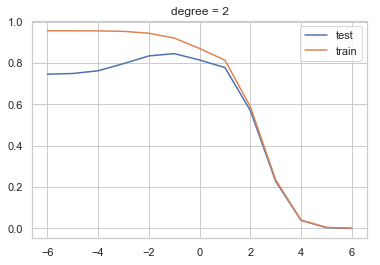

train: 0.956641353665884
test: 0.8458011644557193


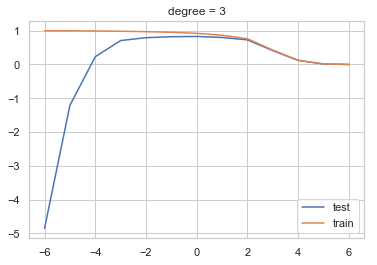

train: 0.9993036809381604
test: 0.8300176198970092


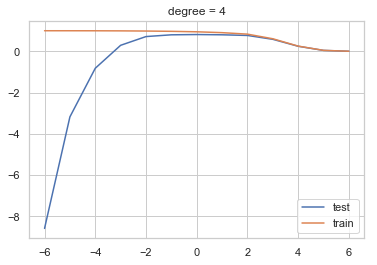

train: 0.9999792367697232
test: 0.8157317754017714


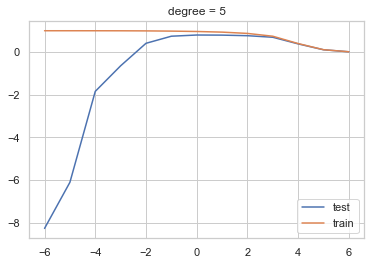

train: 0.9999995308485715
test: 0.7992660924083205


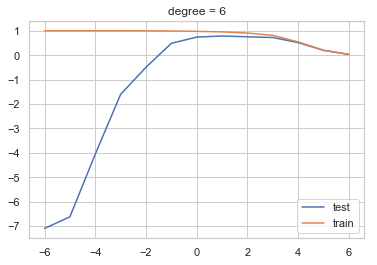

train: 0.9999999826545323
test: 0.7842465726875514


In [55]:
poly = np.arange(2, 7, 1)
for i in range(len(poly_scores)):
    plt.plot(log_alphas, poly_scores[i], label='test')
    plt.plot(log_alphas, poly_train_scores[i], label = 'train')
    plt.title(f'degree = {poly[i]}')
    plt.legend()
    plt.show()
    print(f'train: {np.max(poly_train_scores[i])}')
    print(f'test: {np.max(poly_scores[i])}')

При каких значениях происходит переобучение? А недообучение? Почему?

__Ответ:__
Недообучение происходит при альфа больше 1e2 (score ухудшается, как на трейне, так и на тесте, так как модель становится слишком простой).

Переобучение происходит при:

1) малых степенях альфа (меньше 1e-2)

2) увеличении степени полинома (видно, что при степени полинома большем 3 на трейне скор растет, а на тесте падает).